In [118]:
# Generic imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import PIL
import os
from scipy.special import gamma
import scipy.optimize as optimization

# Local imports
import sys
sys.path.append('../../../')
import stlstuff as sls
import imagestuff as ims
import statstuff as sts

# Development
import importlib
importlib.reload(sts)

<module 'statstuff' from '../../../statstuff.py'>

In [119]:
%matplotlib notebook

In [120]:
# Graphics parameters
fontsize = 10
linewidth = 2
matplotlib.rcParams.update({'font.size': fontsize})

In [121]:
# Set defaults for the analysis
accumlist = [] # This will be all segments unless overridden 

# Only turn this on if we want PDF in terms of Z^2
numforzhist = 30
zmaxforhist = 1.1
zminforhist = -zmaxforhist

In [122]:
# Specify the file we want to analyze (and output file name)
pwd = os.getcwd()
print(pwd)
startpos = pwd.find('crystals/')
case = pwd[startpos+9:]; print(case)
Segmentroot='Segments2'

/Users/nesh/Documents/Repositories/ice4/crystals/2017-06-26_ice4 (basal)/case4.9 rougher
2017-06-26_ice4 (basal)/case4.9 rougher


In [123]:
# Derivative names
Compressedfilename = Segmentroot+'retrieved.npz'; print (Compressedfilename)
Roughnessfile = Segmentroot+'roughness.jpg'; print(Roughnessfile)
RoughnessZ2file = Segmentroot+'roughnessZ2.jpg'; print(RoughnessZ2file)
RoughnessZ2datafile = Segmentroot+'roughnessZ2.txt'; print(RoughnessZ2datafile)
Roughnessdatafile=Segmentroot+'roughness.txt'; print(Roughnessdatafile)
Roughnessfitfile=Segmentroot+'roughnessfit.txt'; print(Roughnessfitfile)

Segments2retrieved.npz
Segments2roughness.jpg
Segments2roughnessZ2.jpg
Segments2roughnessZ2.txt
Segments2roughness.txt
Segments2roughnessfit.txt


In [124]:
# Get the retrieved surface
npzfile = np.load(Compressedfilename)
imageroot = np.array_str(npzfile['imageroot'])
dx,dy,cA,cB,cC,cD,Filename = ims.getc2('', 'SEMimages/', imageroot)
print("dx and dy", dx, dy)

dx and dy 0.6614583 0.6614583


In [125]:
# Setting up windows for where the data are, and the accumulation array
nx1list = npzfile['nx1list']
nx2list = npzfile['nx2list']
ny1list = npzfile['ny1list']
ny2list = npzfile['ny2list']
solution = npzfile['solution']
nsegments = len(nx1list)
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)] 
print('Completed',case) #Prints loading but I wanted to know when it was done.

Completed 2017-06-26_ice4 (basal)/case4.9 rougher


In [126]:
# Graph the segments
im = PIL.Image.open(Filename)
ny_im,nx_im = np.shape(im)
draw = PIL.ImageDraw.Draw(im)
for i in range(nsegments):
    nx1 = nx1list[i]
    nx2 = nx2list[i]
    ny1 = ny1list[i]
    ny2 = ny2list[i]
    ims.myrectangle(draw,(nx1,ny1),(nx2,ny2),2)
im.show() # This shouldn't be necessary but there seems to be a bug with plt.show

In [127]:
# Get the histogram as a function of z
newzbins=np.linspace(zminforhist,zmaxforhist,num=numforzhist)    
hbins_total, zbinsW = sts.makehistogram_heights(\
                             nsegments,nx1list,nx2list,ny1list,ny2list,dx,dy,solution,\
                             accumlist, newzbins)

../../../imagestuff.py:204: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, _, _, _ = np.linalg.lstsq(G, z)


Accumulating ... 1 out of 84
Accumulating ... 2 out of 84
Accumulating ... 3 out of 84
Accumulating ... 4 out of 84
Accumulating ... 5 out of 84
Accumulating ... 6 out of 84
Accumulating ... 7 out of 84
Accumulating ... 8 out of 84
Accumulating ... 9 out of 84
Accumulating ... 10 out of 84
Accumulating ... 11 out of 84
Accumulating ... 12 out of 84
Accumulating ... 13 out of 84
Accumulating ... 14 out of 84
Accumulating ... 15 out of 84
Accumulating ... 16 out of 84
Accumulating ... 17 out of 84
Accumulating ... 18 out of 84
Accumulating ... 19 out of 84
Accumulating ... 20 out of 84
Accumulating ... 21 out of 84
Accumulating ... 22 out of 84
Accumulating ... 23 out of 84
Accumulating ... 24 out of 84
Accumulating ... 25 out of 84
Accumulating ... 26 out of 84
Accumulating ... 27 out of 84
Accumulating ... 28 out of 84
Accumulating ... 29 out of 84
Accumulating ... 30 out of 84
Accumulating ... 31 out of 84
Accumulating ... 32 out of 84
Accumulating ... 33 out of 84
Accumulating ... 34

In [128]:
# Defining a gaussian function
def Gaussian(x,x0,sigma):
    return 1/(sigma*(2*np.pi)**.5)*np.exp(-.5*((x-x0)/sigma)**2)

Gaussian: z0 =  0.0023245240130490086
Gaussian: best_sigma =  0.19076523360038541


<IPython.core.display.Javascript object>


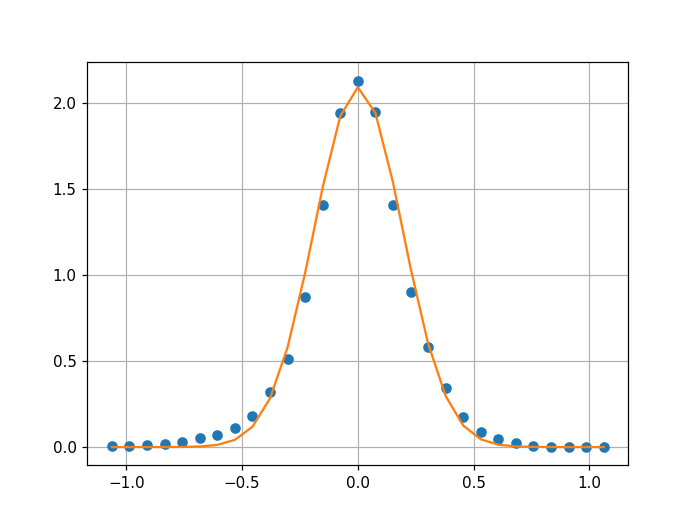

In [141]:
# Getting the best-fit parameters
p0 = np.array([0,0.1])
fsolution, fsolutionerror = optimization.curve_fit(Gaussian, zbinsW, hbins_total, p0)
best_z0 = fsolution[0]; print('Gaussian: z0 = ', best_z0)
best_sigmaG = fsolution[1]; print('Gaussian: best_sigma = ', best_sigmaG)
plt.figure()
plt.plot(zbinsW,hbins_total,'o')
hbins_total_theory = Gaussian(zbinsW,best_z0,best_sigmaG)
plt.plot(zbinsW,hbins_total_theory)
plt.grid(True)

# hbins_z2 = np.abs(hbins_total/(2*zbinsW))
# hbins_z2_theory = np.abs(hbins_total_theory/(2*zbinsW))
# plt.figure()
# plt.plot(zbinsW**2,np.log(hbins_total),'o')
# plt.plot(zbinsW**2,np.log(hbins_z2_theory),'x')
# plt.grid(True)

Gaussian: z0 =  2.002324535139702
Gaussian: best_sigma =  0.1907652380017771


<IPython.core.display.Javascript object>


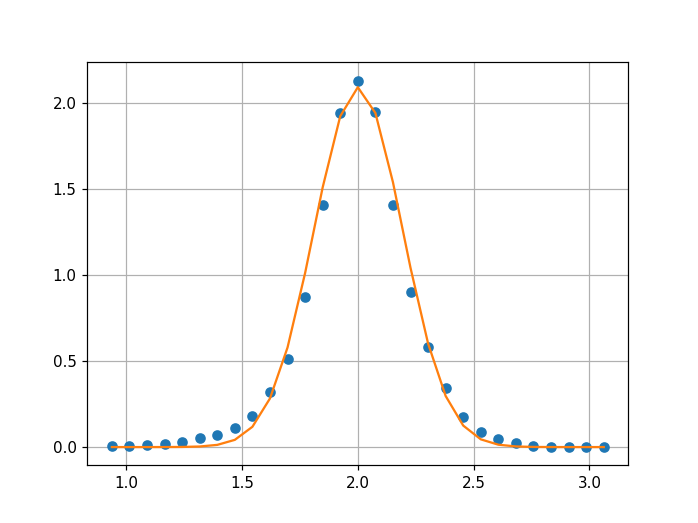

<IPython.core.display.Javascript object>


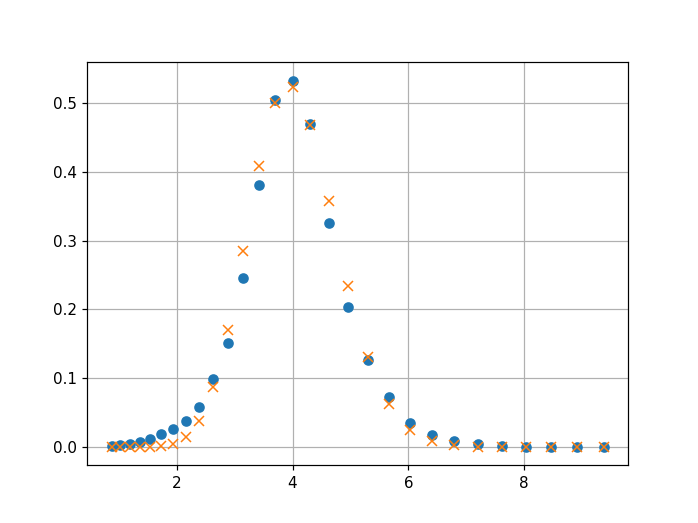

In [152]:
zbinsW_shift = zbinsW+2
p0 = np.array([1,0.1])
fsolution, fsolutionerror = optimization.curve_fit(Gaussian, zbinsW_shift, hbins_total, p0)
best_z0 = fsolution[0]; print('Gaussian: z0 = ', best_z0)
best_sigmaG = fsolution[1]; print('Gaussian: best_sigma = ', best_sigmaG)

plt.figure()
plt.plot(zbinsW_shift,hbins_total,'o')
hbins_total_theory = Gaussian(zbinsW_shift,best_z0,best_sigmaG)
plt.plot(zbinsW_shift,hbins_total_theory)
plt.grid(True)

plt.figure()
hbins_z2 = np.abs(hbins_total/(2*zbinsW_shift))
hbins_z2_theory = np.abs(hbins_total_theory/(2*zbinsW_shift))
# plt.plot(zbinsW_shift**2,np.log(hbins_z2),'o')
# plt.plot(zbinsW_shift**2,np.log(hbins_z2_theory),'x')
plt.plot(zbinsW_shift**2,hbins_z2,'o')
plt.plot(zbinsW_shift**2,hbins_z2_theory,'x')
plt.grid(True)
